In [1]:
## Importing the necessary libraries along with the standard import
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
# regular expression is a package which helps to search certain text (particular text) or string in the data as well do some
# manipulation to the strings or the data
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [2]:
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [3]:
import os
os.getcwd()

'/content'

In [4]:
yelp_reviews = pd.read_csv('yelp.csv')
yelp_reviews.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0  
3  uZetl9T0NcROGOyFfughhg     1       2      0  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0

In [5]:
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
print(yelp_reviews['stars'].nunique())
print(yelp_reviews['stars'].value_counts().sort_values())

5
stars
1     749
2     927
3    1461
5    3337
4    3526
Name: count, dtype: int64


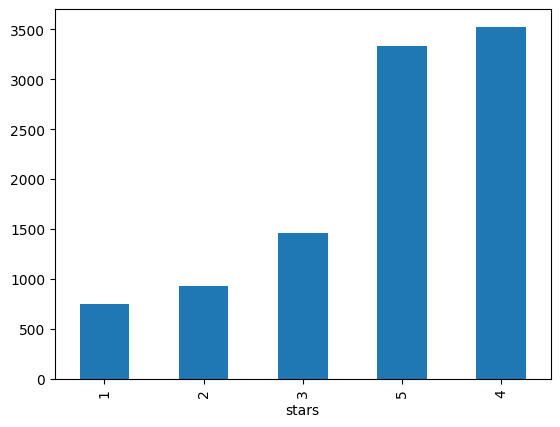

In [7]:
yelp_reviews['stars'].value_counts().sort_values().plot(kind='bar')
plt.show()

In [8]:
((yelp_reviews.isnull() | yelp_reviews.isna()).sum() * 100 / yelp_reviews.index.size).round(2)

business_id    0.0
date           0.0
review_id      0.0
stars          0.0
text           0.0
type           0.0
user_id        0.0
cool           0.0
useful         0.0
funny          0.0
dtype: float64

**BASIC PRE PROCESSING**

**Number of Words**

In [9]:
yelp_reviews['totalwords'] = [len(x.split()) for x in yelp_reviews['text'].tolist()]
yelp_reviews[['text','totalwords','stars']].head()

text  totalwords  stars
0  My wife took me here on my birthday for breakf...         155      5
1  I have no idea why some people give bad review...         257      5
2  love the gyro plate. Rice is so good and I als...          16      4
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...          76      5
4  General Manager Scott Petello is a good egg!!!...          86      5

**Number of Stop Words**

In [10]:
# !pip install nltk

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(len(stop))
stop

179


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
yelp_reviews['stopwords'] = yelp_reviews['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
yelp_reviews[['text','stopwords']].head()

text  stopwords
0  My wife took me here on my birthday for breakf...         59
1  I have no idea why some people give bad review...        114
2  love the gyro plate. Rice is so good and I als...          5
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...         28
4  General Manager Scott Petello is a good egg!!!...         40

**Check what these Stop Words**

In [14]:
yelp_reviews['text_stopwords']= yelp_reviews['text'].apply(lambda x: [x for x in x.split() if x in stop])

yelp_reviews['text_stopwords']

0       [me, here, on, my, for, and, it, was, was, whi...
1       [have, no, why, some, about, this, to, you, ca...
2                               [the, is, so, and, their]
3       [and, very, and, by, a, of, a, and, a, with, a...
4       [is, a, to, into, but, me, you, if, you, have,...
                              ...                        
9995    [here, my, the, and, both, there, was, too, we...
9996    [be, of, on, and, on, about, this, that, but, ...
9997    [and, for, and, after, am, that, has, some, of...
9998    [just, to, so, me, and, a, of, him, here, to, ...
9999    [all, has, some, and, is, at, the, of, my, the...
Name: text_stopwords, Length: 10000, dtype: object

In [15]:
yelp_reviews['text'] = yelp_reviews['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
yelp_reviews['text'].head()


# the moment u remove the stopwords, it becomes meaning less

0    My wife took birthday breakfast excellent. The...
1    I idea people give bad reviews place. It goes ...
2    love gyro plate. Rice good I also dig candy se...
3    Rosie, Dakota, I LOVE Chaparral Dog Park!!! It...
4    General Manager Scott Petello good egg!!! Not ...
Name: text, dtype: object

**Numerics in the text**

In [16]:
yelp_reviews['Numeric']= yelp_reviews['text'].apply(lambda x:len(re.findall(r'[0-9]',x)))
yelp_reviews[['text','Numeric','stars']].head()

text  Numeric  stars
0  My wife took birthday breakfast excellent. The...        1      5
1  I idea people give bad reviews place. It goes ...       14      5
2  love gyro plate. Rice good I also dig candy se...        0      4
3  Rosie, Dakota, I LOVE Chaparral Dog Park!!! It...        0      5
4  General Manager Scott Petello good egg!!! Not ...        0      5

**Remove Special characters, Punctuations**

In [17]:
yelp_reviews['text']= yelp_reviews['text'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.


**Convert all of words into lower case letters**

In [18]:
yelp_reviews['text'] = yelp_reviews['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
yelp_reviews['text'].head()


# remove unwanted uppercase, which may be duplicates

0    my wife took birthday breakfast excellent. the...
1    i idea people give bad reviews place. it goes ...
2    love gyro plate. rice good i also dig candy se...
3    rosie, dakota, i love chaparral dog park!!! it...
4    general manager scott petello good egg!!! not ...
Name: text, dtype: object

**Common Words used- Analyse the occurance of words**

In [19]:
common_words = pd.Series(' '.join(yelp_reviews['text']).split()).value_counts()[:50]
common_words

i          34293
the        11528
place       5200
like        4704
good        4374
food        4328
great       3975
get         3699
one         3684
we          3169
really      3165
go          3042
would       3033
-           2859
it          2684
they        2505
time        2448
this        2352
service     2214
little      2178
also        2150
i'm         2148
back        2145
love        2094
my          2061
i've        2055
always      1966
even        1946
got         1797
pretty      1778
nice        1741
best        1689
ordered     1599
much        1548
us          1513
could       1512
never       1506
it.         1501
try         1498
first       1483
make        1471
think       1462
went        1447
if          1420
people      1386
know        1376
going       1376
chicken     1374
it's        1290
came        1262
Name: count, dtype: int64

**Remove the words that are not required or meaningless**

In [20]:
word_removal=['i','the','get','it','dont','this','im','ive','didnt','my']

In [21]:
yelp_reviews['text'] = yelp_reviews['text'].apply(lambda x: " ".join(x for x in x.split() if x not in word_removal))
yelp_reviews['text'].head()

0    wife took birthday breakfast excellent. weathe...
1    idea people give bad reviews place. goes show ...
2    love gyro plate. rice good also dig candy sele...
3    rosie, dakota, love chaparral dog park!!! it's...
4    general manager scott petello good egg!!! not ...
Name: text, dtype: object

**Words that are not used frequently**

In [22]:
Not_frequent = pd.Series(' '.join(yelp_reviews['text']).split()).value_counts()[-50:]  # from bottom get 50 least occurcing owrds
Not_frequent

well...no                1
service...awful          1
prices...average         1
inventory....and         1
experience....because    1
$3.69!                   1
artesian                 1
giadiniera               1
joking,                  1
wheel?                   1
foodgasm?                1
teharu:                  1
sunumono                 1
teharu                   1
buget                    1
"6                       1
pickles".                1
irresistable             1
oops                     1
rx,                      1
sauce(a                  1
"cock"                   1
vaporized                1
euphoria,                1
shank,                   1
meatball.                1
mostaccioli              1
now!.                    1
and.....                 1
yummy...although         1
bag...just               1
"low                     1
fat/fat                  1
bastard."                1
is...so                  1
two-three                1
acceptable!              1
b

**Remove these words**

In [23]:
yelp_reviews['text'] = yelp_reviews['text'].apply(lambda x: " ".join(x for x in x.split() if x not in Not_frequent))
yelp_reviews['text'].head()

0    wife took birthday breakfast excellent. weathe...
1    idea people give bad reviews place. goes show ...
2    love gyro plate. rice good also dig candy sele...
3    rosie, dakota, love chaparral dog park!!! it's...
4    general manager scott petello good egg!!! not ...
Name: text, dtype: object

**Stemming**

In [24]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
from nltk.stem import WordNetLemmatizer
lemmatizerword = WordNetLemmatizer()
yelp_reviews['text'][:5].apply(lambda x: " ".join([lemmatizerword.lemmatize(i) for i in x.split()]))

0    wife took birthday breakfast excellent. weathe...
1    idea people give bad review place. go show you...
2    love gyro plate. rice good also dig candy sele...
3    rosie, dakota, love chaparral dog park!!! it's...
4    general manager scott petello good egg!!! not ...
Name: text, dtype: object

**Sentiment Analysis**

<Axes: ylabel='count'>

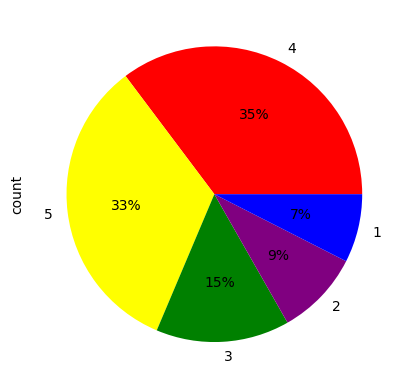

In [26]:
yelp_reviews.stars.value_counts().plot(kind='pie',
                                       autopct='%1.0f%%',
                                       colors=["red","yellow","green","purple","blue"])

**Lets see what this words are in group 4 and 5 using word cloud**

In [27]:
from wordcloud import WordCloud,STOPWORDS

positives=yelp_reviews[(yelp_reviews['stars']==4) |(yelp_reviews['stars']==5 )]
p_words = ' '.join(positives['text'])
p_words

'wife took birthday breakfast excellent. weather perfect made sitting outside overlooking grounds absolute pleasure. our waitress excellent food arrived quickly semi-busy saturday morning. looked like place fills pretty quickly earlier better. do favor bloody mary. phenomenal simply best i\'ve ever had. i\'m pretty sure use ingredients garden blend fresh order it. amazing. while everything menu looks excellent, white truffle scrambled eggs vegetable skillet tasty delicious. came 2 pieces griddled bread amazing absolutely made meal complete. best "toast" i\'ve ever had. anyway, can\'t wait go back! idea people give bad reviews place. goes show you, please everyone. they probably griping something fault...there many people like that. in case, friend arrived 5:50 pm past sunday. pretty crowded, thought sunday evening thought would wait forever seat said we\'ll seated girl comes back seating someone else. we seated 5:52 waiter came got drink orders. everyone pleasant host seated us waiter 

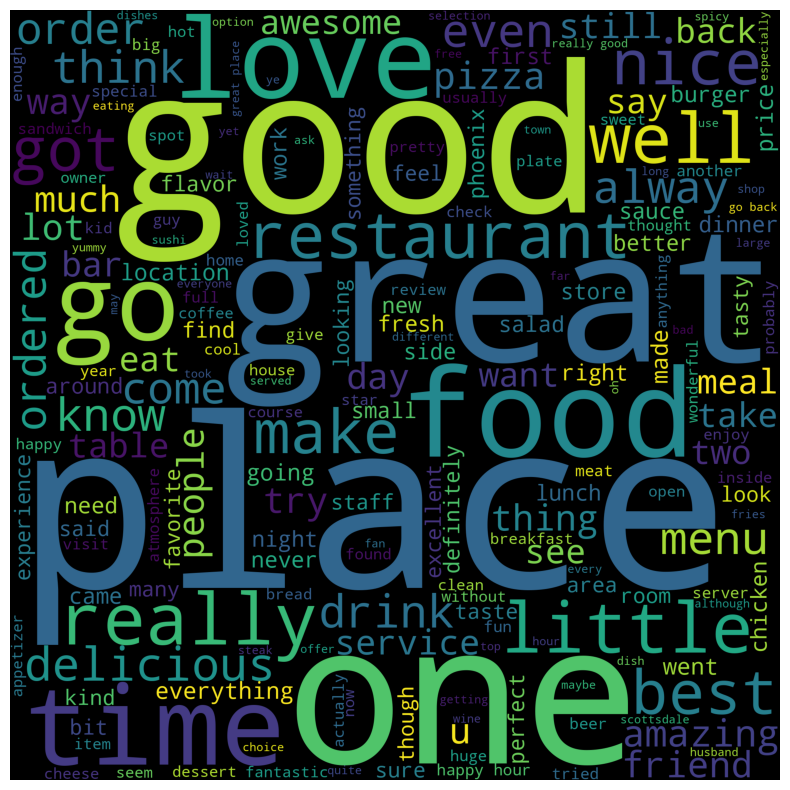

In [28]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=2000
                     ).generate(p_words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Neutral and Negative Sentiments**

In [29]:
neut_neg=yelp_reviews[(yelp_reviews['stars']==1) |(yelp_reviews['stars']==2)]
n_words = ' '.join(neut_neg['text'])
n_words

'was worth 21$ salad small pizza? absolutely not! bad service. maybe guys grandma died know. want tell really made mad experience. we order small pizza salad guys could cared less took $ sat down. we looking around hmm, there\'s sign saying "x large pizza large salad 23$". wow would nice guy told us that. left hungry, mad unsatisfied. to owner: teach employees value upselling telling specials. something small affect customers experience negatively. and salads severely overpriced won\'t go back unless i\'m desperate. u go n check car out. if u wanna buy 1 there? that\'s wrong move! if u even want car service there? u made biggest mistake ur life!! 1 time asked girlfriend take car oil service, guess what? they ripped girlfriend lying bad car now. if without fixing problem. might bring serious accident. then said. 4 brand new tires, timing belt, 4 new brake pads. u know why\'s worst? all changed 2 months before!!! what trashy dealer that? people, better go somewhere! disgusting! had group

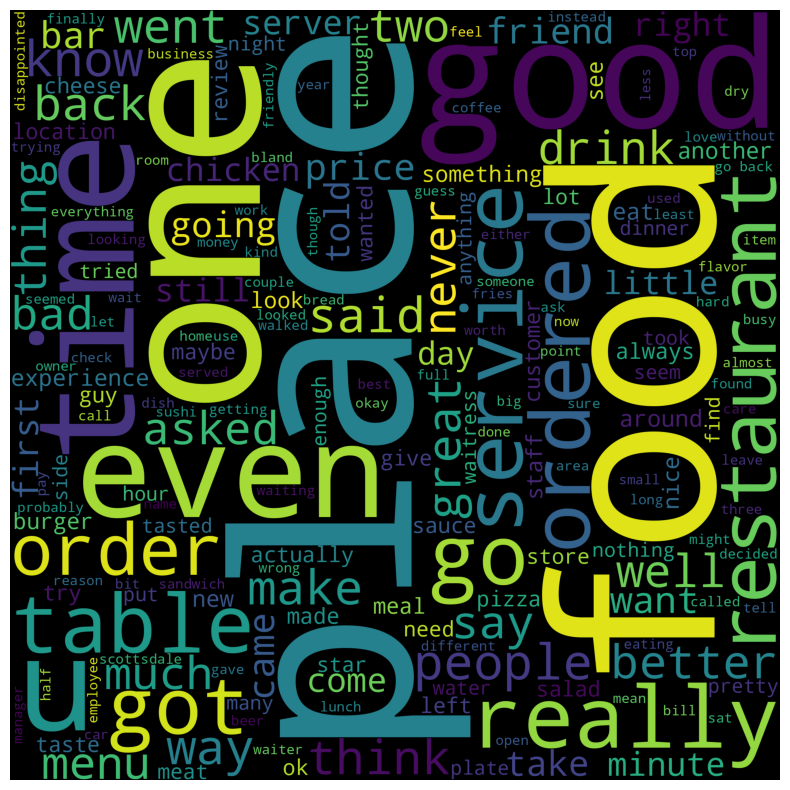

In [30]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=2000
                     ).generate(n_words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [31]:
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   business_id     10000 non-null  object
 1   date            10000 non-null  object
 2   review_id       10000 non-null  object
 3   stars           10000 non-null  int64 
 4   text            10000 non-null  object
 5   type            10000 non-null  object
 6   user_id         10000 non-null  object
 7   cool            10000 non-null  int64 
 8   useful          10000 non-null  int64 
 9   funny           10000 non-null  int64 
 10  totalwords      10000 non-null  int64 
 11  stopwords       10000 non-null  int64 
 12  text_stopwords  10000 non-null  object
 13  Numeric         10000 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.1+ MB


**Lets extact the columns required for analysis**

In [32]:
yelp_sentiments = yelp_reviews[['text','stars']]

In [33]:
X = yelp_sentiments.text
y = yelp_sentiments.stars

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                random_state=0)

In [35]:
Xtrain.shape

(7500,)

In [36]:
Xtest.shape

(2500,)

**Lets Create DTM (Document Term Matrix)**

In [37]:
vector = CountVectorizer(stop_words='english',min_df=9, max_df=0.85)

In [38]:
# here we are learning all the unique words for the reviews collected.
vector.fit(Xtrain)

CountVectorizer(max_df=0.85, min_df=9, stop_words='english')

In [39]:
vector.get_feature_names_out()

array(['00', '000', '07', ..., 'zone', 'zoo', 'zucchini'], dtype=object)

In [40]:
len(vector.get_feature_names_out())

4836

In [41]:
# transform the words into Document Term Matrix -DTM
DTM_train = vector.transform(Xtrain)

In [42]:
DTM_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
features_train = pd.DataFrame(DTM_train.toarray(),columns=vector.get_feature_names_out())
features_train

00  000  07  10  100  1000  101  10pm  11  110  ...  yum  yummy  yup  \
0      0    0   0   0    0     0    0     0   0    0  ...    1      0    0   
1      0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
2      0    0   0   0    0     0    0     0   1    0  ...    0      0    0   
3      0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
4      0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
...   ..  ...  ..  ..  ...   ...  ...   ...  ..  ...  ...  ...    ...  ...   
7495   0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
7496   0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
7497   0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
7498   0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
7499   0    0   0   0    0     0    0     0   0    0  ...    0      0    0   

      zero  zinburger  zinc  zipps  zone  zoo  zucchini  
0        0          0     0      0     0    0         0  
1        0          0     0      0     0    0         0  
2        0          0     0      0     0    0         0  
3        0          0     0      0     0    0         0  
4        0          0     0      0     0    0         0  
...    ...        ...   ...    ...   ...  ...       ...  
7495     0          0     0      0     0    0         0  
7496     0          0     0      0     0    0         0  
7497     0          0     0      0     0    0         0  
7498     0          0     0      0     0    0         0  
7499     0          0     0      0     0    0         0  

[7500 rows x 4836 columns]

**Transform the Test Data using the learning of Training Data**

In [44]:
DTM_test = vector.transform(Xtest)

In [45]:
DTM_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
features_test = pd.DataFrame(DTM_test.toarray(),columns=vector.get_feature_names_out())
features_test

00  000  07  10  100  1000  101  10pm  11  110  ...  yum  yummy  yup  \
0      0    0   0   0    0     0    0     0   0    0  ...    0      1    0   
1      0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
2      0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
3      0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
4      0    0   0   0    0     0    0     0   0    0  ...    1      0    0   
...   ..  ...  ..  ..  ...   ...  ...   ...  ..  ...  ...  ...    ...  ...   
2495   0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
2496   0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
2497   0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
2498   0    0   0   0    0     0    0     0   0    0  ...    0      0    0   
2499   0    0   0   0    0     0    0     0   0    0  ...    0      1    0   

      zero  zinburger  zinc  zipps  zone  zoo  zucchini  
0        0          0     0      0     0    0         0  
1        0          0     0      0     0    0         0  
2        0          0     0      0     0    0         0  
3        0          0     0      0     0    0         0  
4        0          0     0      0     0    0         1  
...    ...        ...   ...    ...   ...  ...       ...  
2495     0          0     0      0     0    0         0  
2496     0          0     0      0     0    0         0  
2497     0          0     0      0     0    0         0  
2498     1          0     0      0     0    0         0  
2499     0          0     0      0     0    0         0  

[2500 rows x 4836 columns]

**Random Forest**

In [47]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=150, random_state=0)
RF_model.fit(DTM_train, ytrain)

RandomForestClassifier(n_estimators=150, random_state=0)

In [48]:
from sklearn import metrics
ytest_predict = RF_model.predict(DTM_test)
model_score =RF_model.score(DTM_test, ytest)
print(model_score)

print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.474
[[ 67  12   9  69  31]
 [ 11  12  24 142  31]
 [  3   1  19 272  61]
 [  6   1   6 596 273]
 [  4   0   1 358 491]]
              precision    recall  f1-score   support

           1       0.74      0.36      0.48       188
           2       0.46      0.05      0.10       220
           3       0.32      0.05      0.09       356
           4       0.41      0.68      0.51       882
           5       0.55      0.57      0.56       854

    accuracy                           0.47      2500
   macro avg       0.50      0.34      0.35      2500
weighted avg       0.48      0.47      0.43      2500



In [49]:
from sklearn.naive_bayes import MultinomialNB


In [50]:
nb_model = MultinomialNB()
nb_model.fit(DTM_train, ytrain)

MultinomialNB()

In [51]:
ytest_predict = nb_model.predict(DTM_test)
model_score =nb_model.score(DTM_test, ytest)
print(model_score)

print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.5096
[[102  47  18  10  11]
 [ 37  60  74  39  10]
 [ 14  43 111 147  41]
 [ 21  30  97 487 247]
 [ 25  15  28 272 514]]
              precision    recall  f1-score   support

           1       0.51      0.54      0.53       188
           2       0.31      0.27      0.29       220
           3       0.34      0.31      0.32       356
           4       0.51      0.55      0.53       882
           5       0.62      0.60      0.61       854

    accuracy                           0.51      2500
   macro avg       0.46      0.46      0.46      2500
weighted avg       0.51      0.51      0.51      2500



**n Gram **

In [52]:
vector_gram = CountVectorizer(ngram_range =(1,2), stop_words='english',min_df=9, max_df=0.85)
vector_gram.fit(Xtrain)

CountVectorizer(max_df=0.85, min_df=9, ngram_range=(1, 2), stop_words='english')

In [53]:
vector_gram.get_feature_names_out()

array(['00', '000', '07', ..., 'zone', 'zoo', 'zucchini'], dtype=object)

In [54]:
DTM_train = vector_gram.transform(Xtrain)
DTM_test = vector_gram.transform(Xtest)

In [55]:
nb_model = MultinomialNB()
nb_model.fit(DTM_train, ytrain)

MultinomialNB()

In [56]:
DTM_train.shape

(7500, 7255)

In [57]:
DTM_test.shape

(2500, 7255)

In [58]:
ytest_predict = nb_model.predict(DTM_test)
model_score =nb_model.score(DTM_test, ytest)
print(model_score)

print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.5144
[[103  48  19   9   9]
 [ 39  62  72  38   9]
 [ 14  41 115 135  51]
 [ 23  26 100 474 259]
 [ 27   9  27 259 532]]
              precision    recall  f1-score   support

           1       0.50      0.55      0.52       188
           2       0.33      0.28      0.31       220
           3       0.35      0.32      0.33       356
           4       0.52      0.54      0.53       882
           5       0.62      0.62      0.62       854

    accuracy                           0.51      2500
   macro avg       0.46      0.46      0.46      2500
weighted avg       0.51      0.51      0.51      2500



1. Model is predicting well for 4 star and 5 star.
2. Model is not predicting well for 2 star and 3 star.
3. There is less amount of data to learn from 2 and 3 star.

**Lets create 2 groups - Positive and Negative Reviews**

In [59]:
yelp_reviews.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'totalwords', 'stopwords', 'text_stopwords',
       'Numeric'],
      dtype='object')

In [60]:
def review(stars):

    if stars==1:

      return "Negative"

    elif stars==2:
      return "Negative"

    elif stars==3:
      return "Negative"

    else: return "Positive"

In [61]:
yelp_reviews["Sentiment"] = yelp_reviews['stars'].apply(review)

yelp_reviews.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  wife took birthday breakfast excellent. weathe...  review   
1  idea people give bad reviews place. goes show ...  review   
2  love gyro plate. rice good also dig candy sele...  review   
3  rosie, dakota, love chaparral dog park!!! it's...  review   
4  general manager scott petello good egg!!! not ...  review   

                  user_id  cool  useful  funny  totalwords  stopwords  \
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0         155         59   
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0         257        114   
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0          16          5   
3  uZetl9T0NcROGOyFfughhg     1       2      0          76         28   
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0          86         40   

                                      text_stopwords  Numeric Sentiment  
0  [me, here, on, my, for, and, it, was, was, whi...        1  Positive  
1  [have, no, why, some, about, this, to, you, ca...       14  Positive  
2                          [the, is, so, and, their]        0  Positive  
3  [and, very, and, by, a, of, a, and, a, with, a...        0  Positive  
4  [is, a, to, into, but, me, you, if, you, have,...        0  Positive

In [62]:
yelp_reviews["Sentiment"].value_counts()

Sentiment
Positive    6863
Negative    3137
Name: count, dtype: int64

<Axes: ylabel='count'>

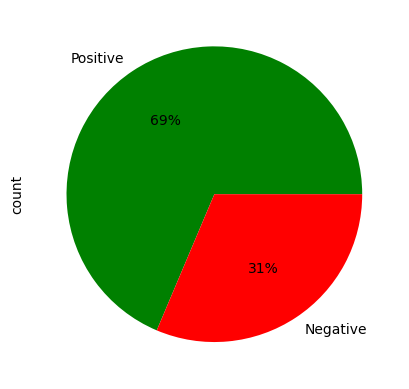

In [63]:
yelp_reviews.Sentiment.value_counts().plot(kind='pie',
                                       autopct='%1.0f%%',
                                       colors=["Green","Red"])

In [64]:
yelp_sentiments = yelp_reviews[['text','Sentiment']]

In [65]:
X = yelp_sentiments.text
y = yelp_sentiments.Sentiment

In [66]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                random_state=0)

In [67]:
vector_2c = CountVectorizer(stop_words='english',min_df=9, max_df=0.85)

vector_2c.fit(Xtrain)
DTM_train = vector_2c.transform(Xtrain)
DTM_test = vector_2c.transform(Xtest)

**Random Forest Model**

In [68]:
RF_model = RandomForestClassifier(n_estimators=150, random_state=0)
RF_model.fit(DTM_train, ytrain)

RandomForestClassifier(n_estimators=150, random_state=0)

In [69]:
ytest_predict = RF_model.predict(DTM_test)
model_score =RF_model.score(DTM_test, ytest)
print(model_score)

print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.8236
[[ 415  349]
 [  92 1644]]
              precision    recall  f1-score   support

    Negative       0.82      0.54      0.65       764
    Positive       0.82      0.95      0.88      1736

    accuracy                           0.82      2500
   macro avg       0.82      0.75      0.77      2500
weighted avg       0.82      0.82      0.81      2500



**Linear Discriminant Analysis- LDA**

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(DTM_train.toarray(), ytrain)

LinearDiscriminantAnalysis()

In [71]:
## Performance Matrix on test data set
ytest_predict = LDA_model.predict(DTM_test)
model_score = LDA_model.score(DTM_test, ytest)
print(model_score)

print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.6964
[[ 426  338]
 [ 421 1315]]
              precision    recall  f1-score   support

    Negative       0.50      0.56      0.53       764
    Positive       0.80      0.76      0.78      1736

    accuracy                           0.70      2500
   macro avg       0.65      0.66      0.65      2500
weighted avg       0.71      0.70      0.70      2500



**Naive Bayes**

In [72]:
nb_model = MultinomialNB()
nb_model.fit(DTM_train, ytrain)

MultinomialNB()

In [73]:
ytest_predict = nb_model.predict(DTM_test)
model_score =nb_model.score(DTM_test, ytest)
print(model_score)

print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.8208
[[ 530  234]
 [ 214 1522]]
              precision    recall  f1-score   support

    Negative       0.71      0.69      0.70       764
    Positive       0.87      0.88      0.87      1736

    accuracy                           0.82      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.82      0.82      0.82      2500

